# Single cell Analysis of HGSOC from GSE184880

In [1]:
# load packages
import numpy as np
import pandas as pd
import scanpy as sc
import os
import scanpy as sc
from scanpy.pp import combat

In [2]:
sc.settings.verbosity = 3 # set log level: errors(0),warnings(1),info(2),hints(3)
sc.logging.print_header() # print version
sc.settings.set_figure_params(dpi=80, facecolor='white') # set resolution and etc

scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.23.5 scipy==1.11.4 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.11


In [3]:
# results path
results_file = 'results/'

In [4]:
sample_file = "/Users/jialechen/Desktop/PhD/CT/HGSPC_scRNAseq/sample.txt"
sample_names = [name.strip() for name in open(sample_file).readlines()]
sample_names

['GSM5599220_Norm1',
 'GSM5599221_Norm2',
 'GSM5599222_Norm3',
 'GSM5599223_Norm4',
 'GSM5599224_Norm5',
 'GSM5599225_Cancer1',
 'GSM5599226_Cancer2',
 'GSM5599227_Cancer3',
 'GSM5599228_Cancer4',
 'GSM5599229_Cancer5',
 'GSM5599230_Cancer6',
 'GSM5599231_Cancer7']

In [5]:
# create a blank list to store AnnData object in each sample 
adatas = []

# load data in loop
for sample_name in sample_names:

    data_path = f"data/{sample_name}/"
    adata = sc.read_10x_mtx(data_path, var_names='gene_symbols', cache=True)
    adata.obs['sample'] = sample_name
    
    if "Norm" in sample_name:
        adata.obs['group'] = 'norm'
    elif "Cancer" in sample_name:
        adata.obs['group'] = 'cancer'

    adatas.append(adata)
    
# combine data
merged_adata = sc.concat(adatas, join='outer', index_unique=None)


... reading from cache file cache/data-GSM5599220_Norm1-matrix.h5ad
... reading from cache file cache/data-GSM5599221_Norm2-matrix.h5ad


/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


... reading from cache file cache/data-GSM5599222_Norm3-matrix.h5ad
... reading from cache file cache/data-GSM5599223_Norm4-matrix.h5ad


/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


... reading from cache file cache/data-GSM5599224_Norm5-matrix.h5ad
... reading from cache file cache/data-GSM5599225_Cancer1-matrix.h5ad


/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


... reading from cache file cache/data-GSM5599226_Cancer2-matrix.h5ad
... reading from cache file cache/data-GSM5599227_Cancer3-matrix.h5ad


/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


... reading from cache file cache/data-GSM5599228_Cancer4-matrix.h5ad
... reading from cache file cache/data-GSM5599229_Cancer5-matrix.h5ad


/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


... reading from cache file cache/data-GSM5599230_Cancer6-matrix.h5ad
... reading from cache file cache/data-GSM5599231_Cancer7-matrix.h5ad


/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
merged_adata
adata = merged_adata

## Show the top 20 genes ranked by the percentage of gene counts in total counts across all individual cells

normalizing counts per cell
    finished (0:00:00)


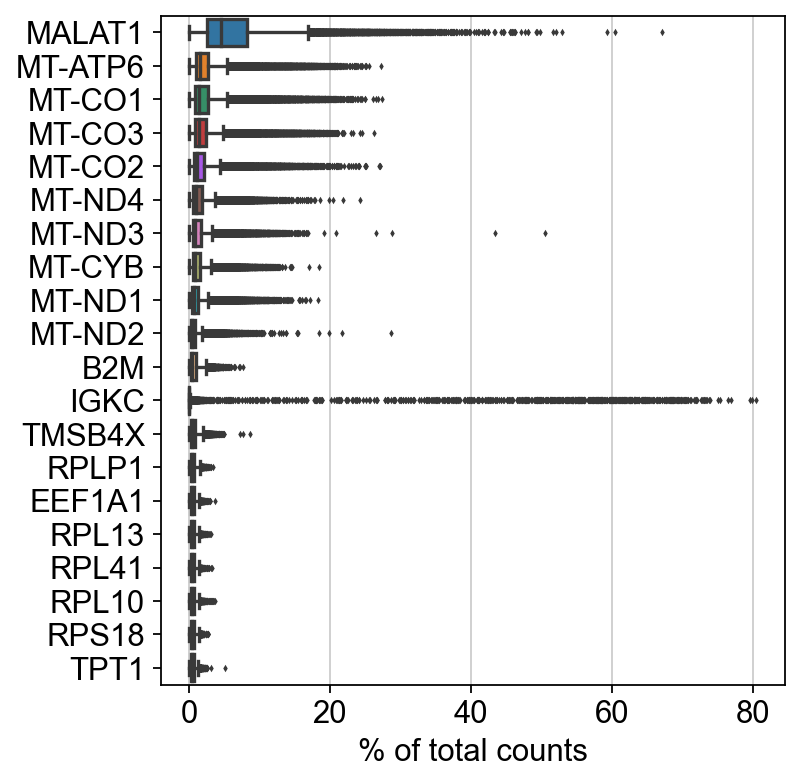

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [8]:
# qc——Filter out genes expressed in fewer than three cells or cell samples expressing fewer than 200 genes in a single cell
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1161 cells that have less than 200 genes expressed


/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


filtered out 4765 genes that are detected in less than 3 cells


/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
adata

AnnData object with n_obs × n_vars = 64659 × 23219
    obs: 'sample', 'group', 'n_genes'
    var: 'n_cells'

## Filtering cells that contain mitochondrial genes and over-expressed genes ##

- Transcripts of mitochondrial genes are larger than individual transcript molecules and are less likely to escape through the cell membrane. A high percentage of mitochondrial genes detected indicates poor cell quality.

- The over-expression of genes may be due to a single oil droplet encapsulating multiple cells, thus detecting a higher number of genes than would normally be detected, and therefore filtering these cells.

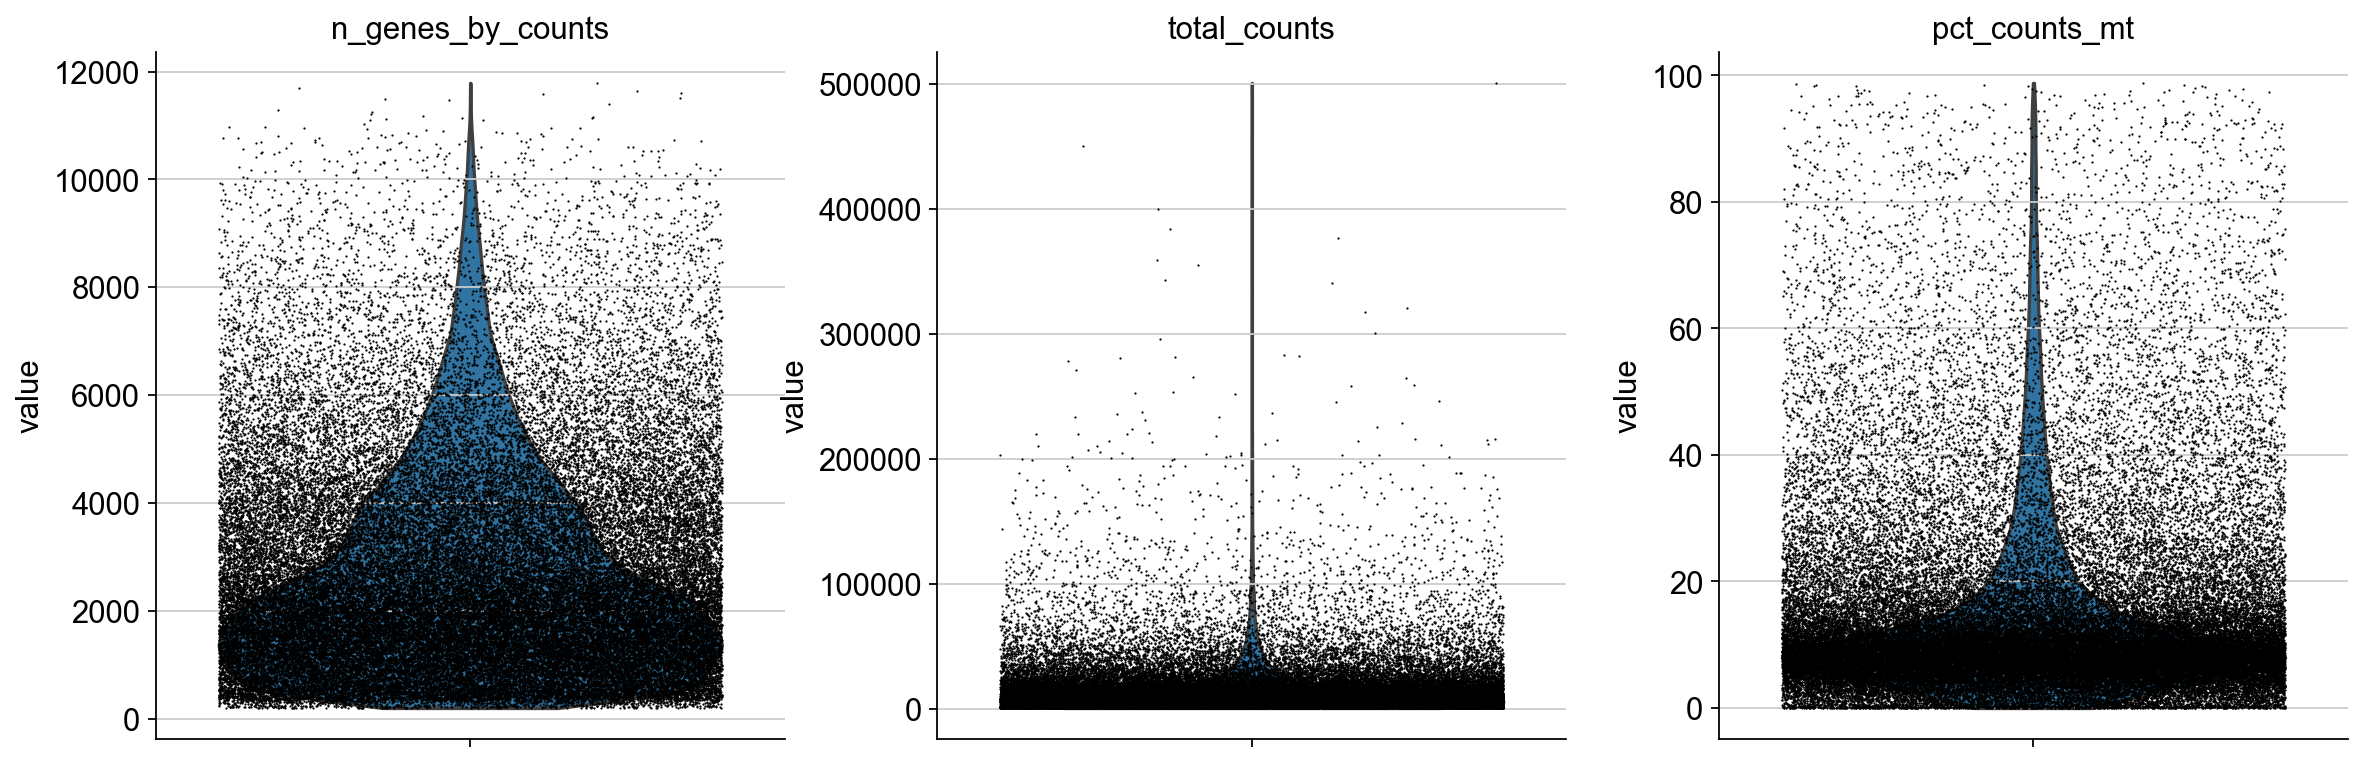

In [10]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

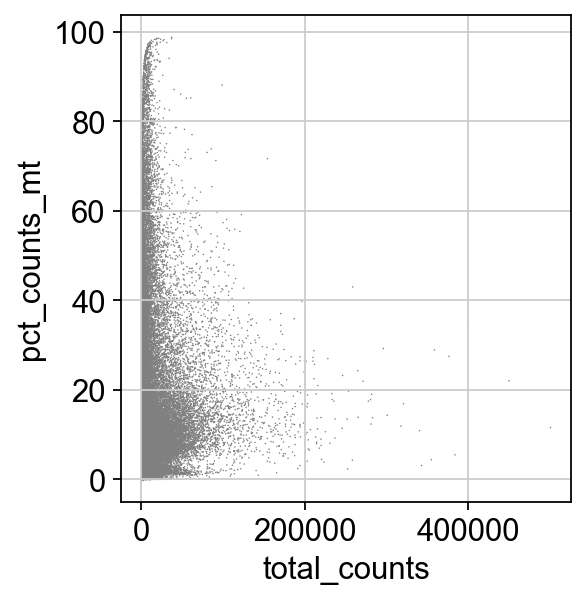

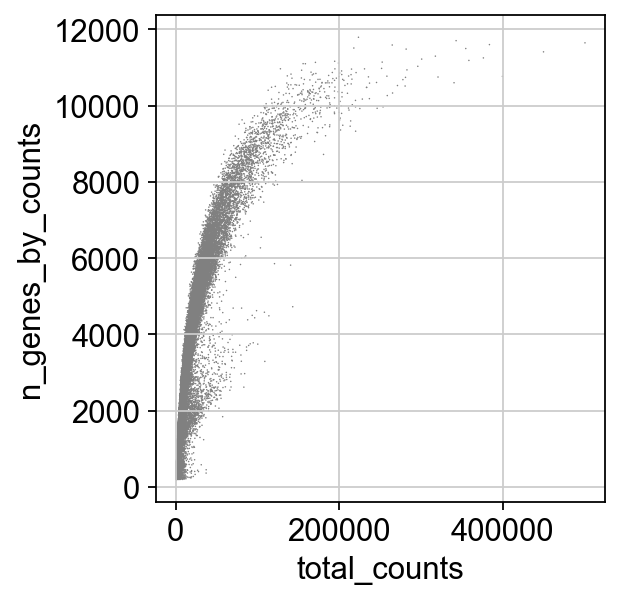

In [11]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [12]:
# 获取线粒体基因占比在20%以下的细胞样本
adata = adata[adata.obs.pct_counts_mt<20, :]
# 获取表达基因数在3500以下的细胞样本
adata = adata[adata.obs.n_genes_by_counts<10000, :]

In [13]:
adata

View of AnnData object with n_obs × n_vars = 51215 × 23219
    obs: 'sample', 'group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

## Normalization

- Enables comparability between different cell samples

In [14]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/Users/jialechen/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell


/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:00)


## Save data
    
- Set the .raw property of the AnnData object to normalized and logarithmic raw gene expression for later use in differential gene expression testing and visualization

In [15]:
adata.raw = adata

## Identify variable genes

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


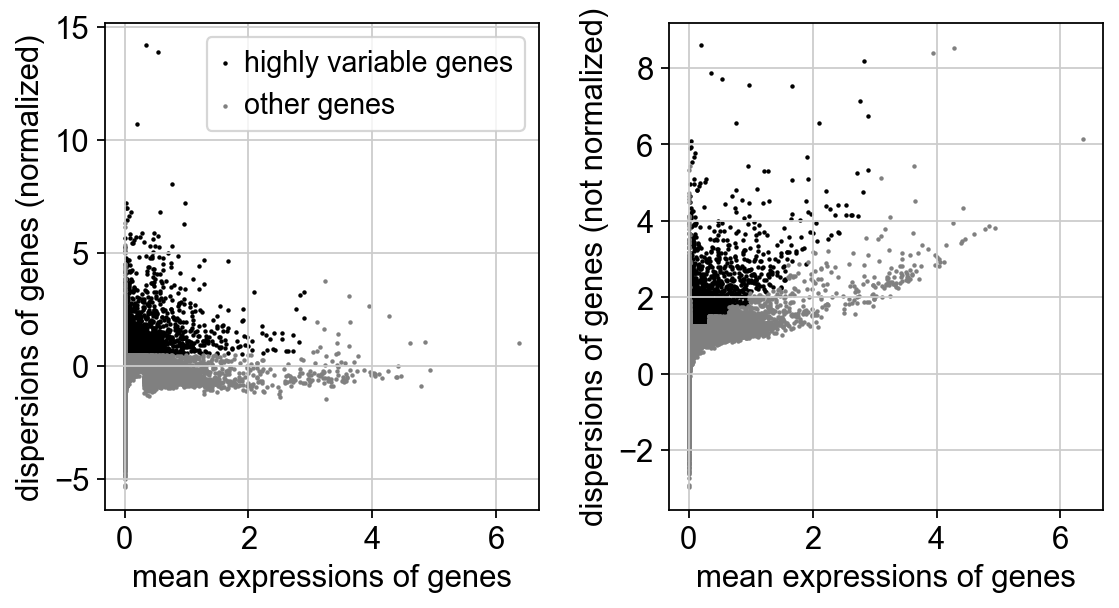

In [16]:
# calculate
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# plot 
sc.pl.highly_variable_genes(adata)

## 获取只有高变基因的数据集

In [17]:
adata = adata[:, adata.var.highly_variable]
# 回归每个细胞的总计数和表达的线粒体基因的百分比的影响.
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
# 将每个基因缩放到单位方差,阈值超过标准偏差10.
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:01:00)


In [18]:
adata

AnnData object with n_obs × n_vars = 51215 × 3533
    obs: 'sample', 'group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [19]:
## Run PCA 

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:14)


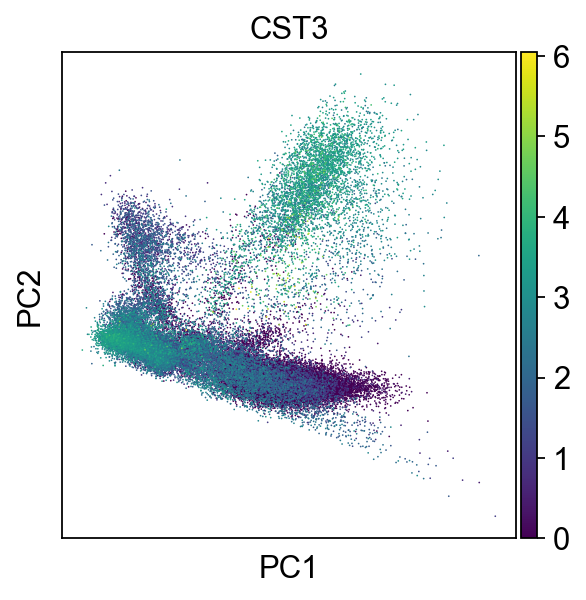

In [20]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3')

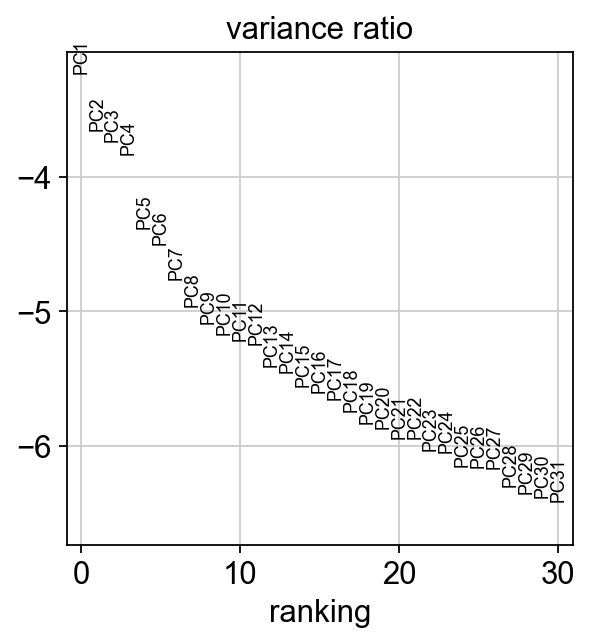

In [21]:
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


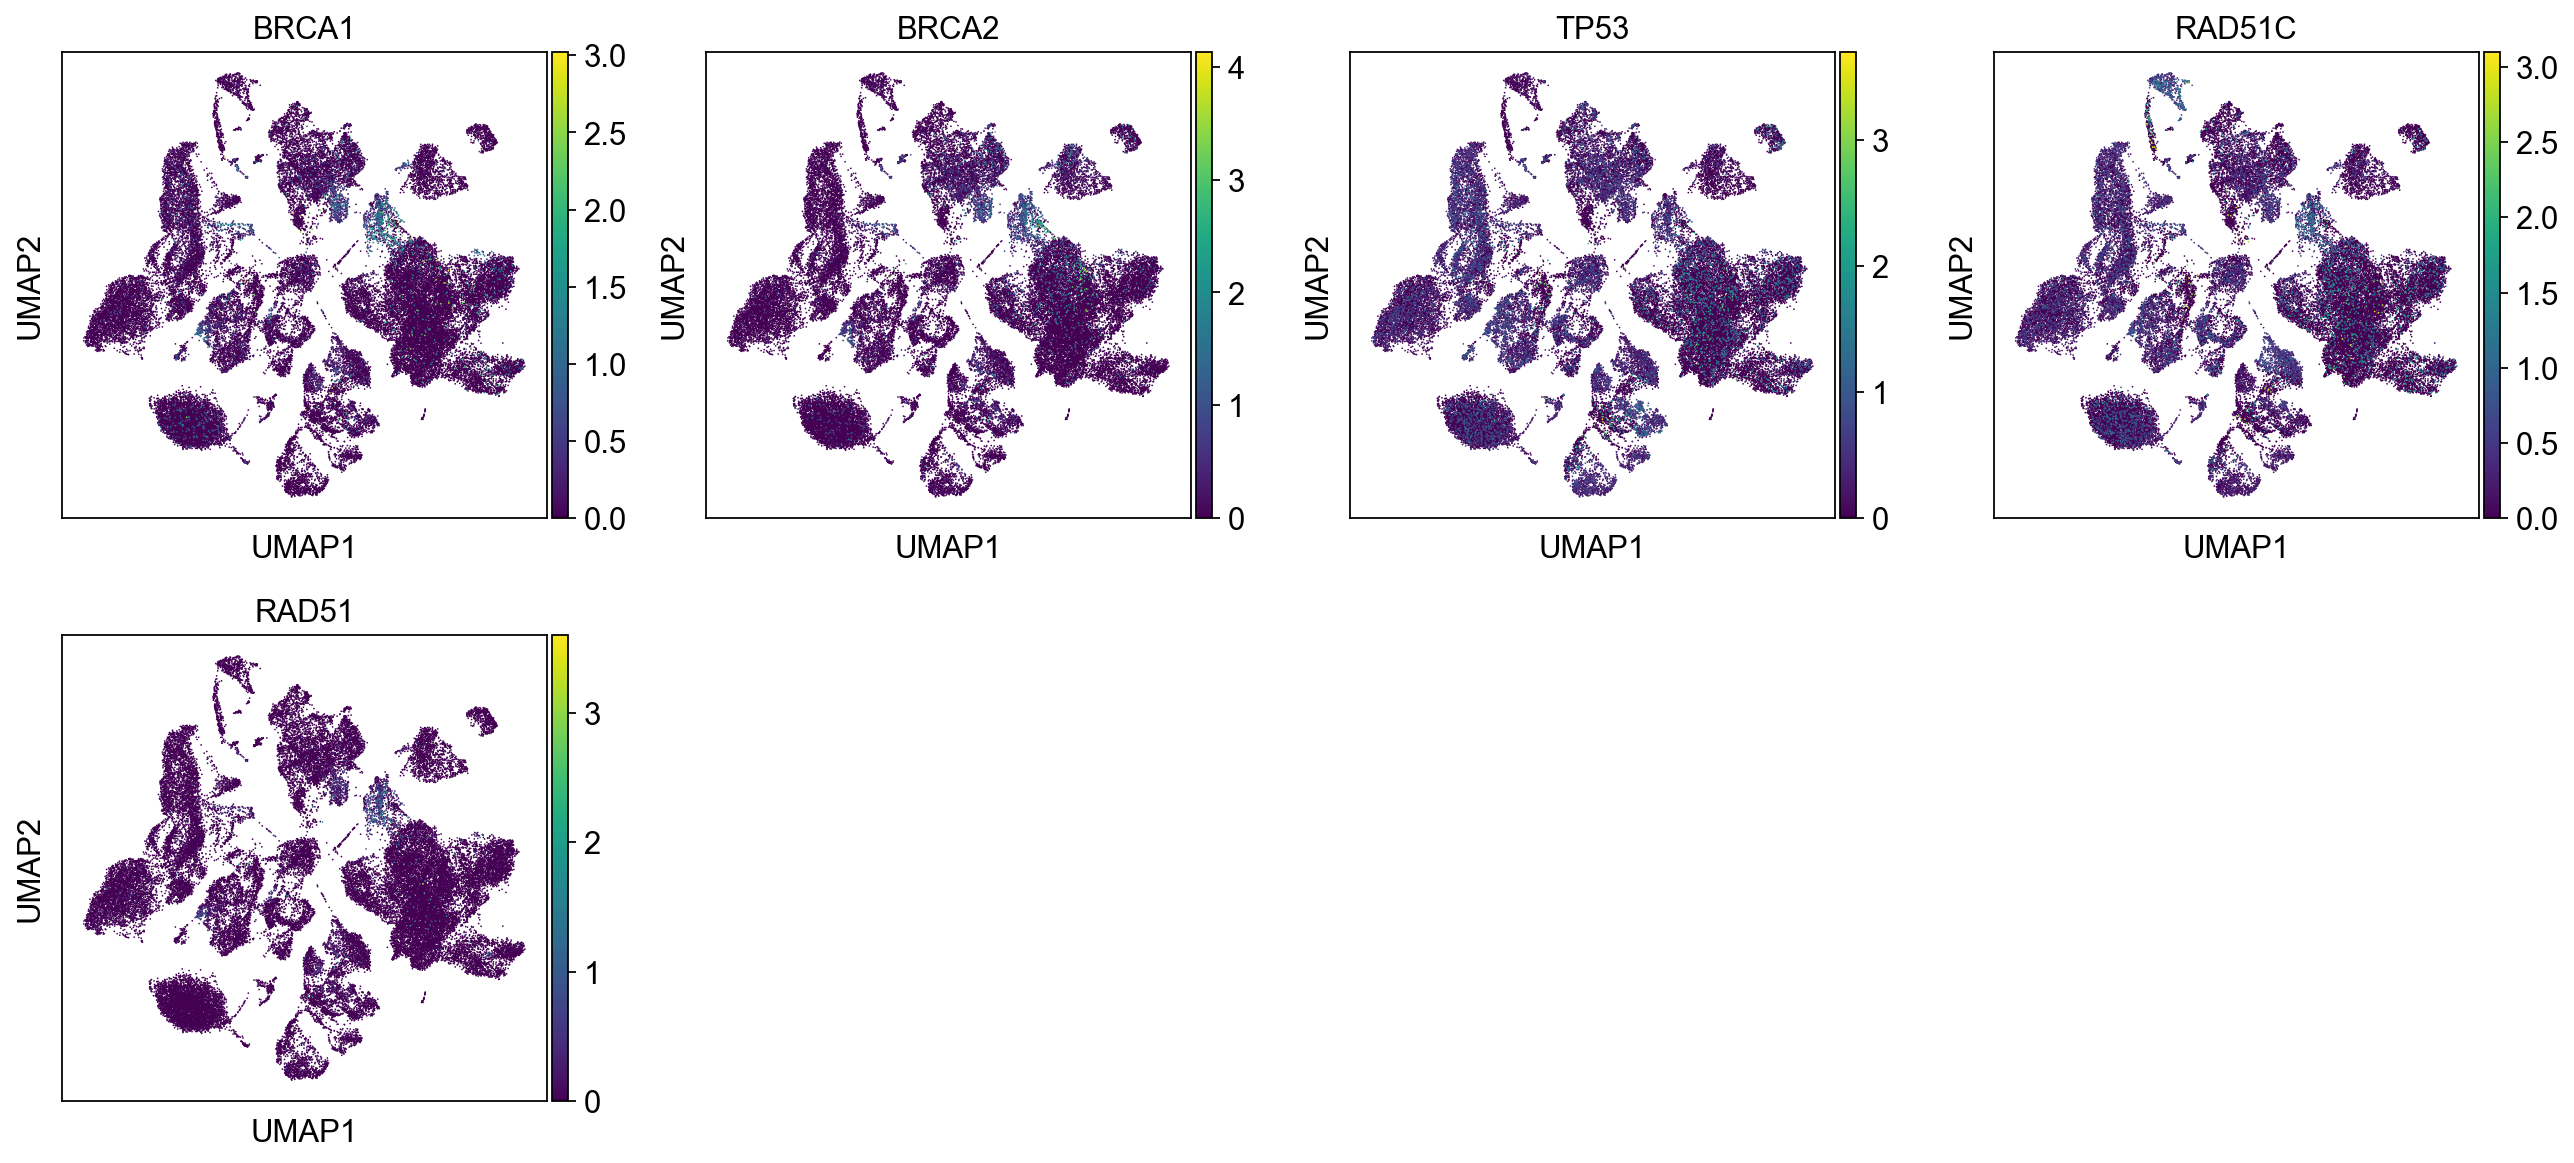

In [25]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['BRCA1', 'BRCA2', 'TP53', 'RAD51C', 'RAD51'])

## Leiden图聚类

running Leiden clustering
    finished: found 43 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:14)


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


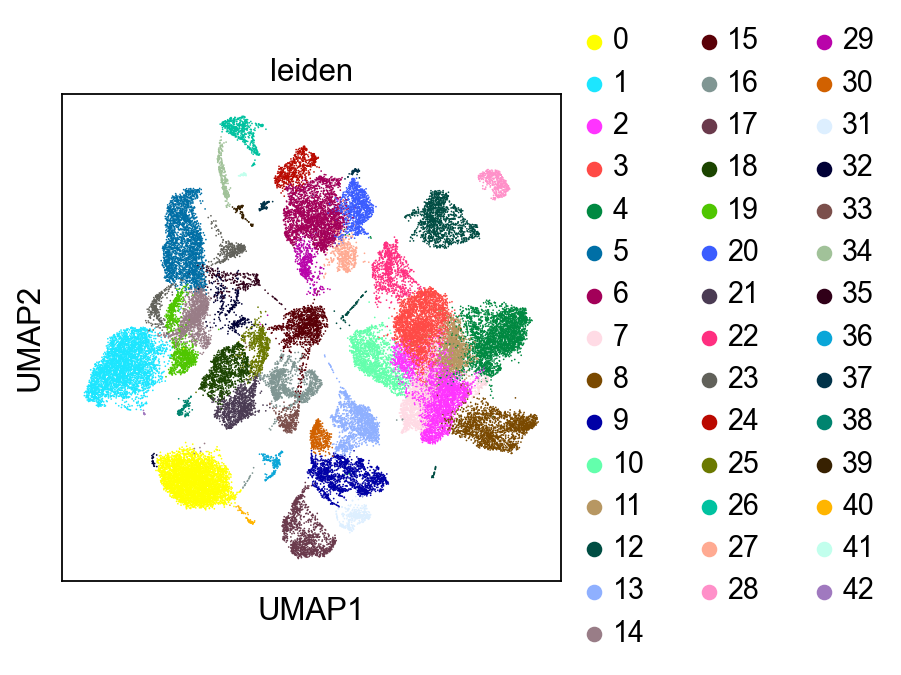

In [26]:
# 计算
sc.tl.leiden(adata)
# 绘制
sc.pl.umap(adata, color=['leiden'])

## Find mareker genes
- 先计算每个leiden分群中高度差异基因的排名,取排名前25的基因

- 最简单和最快的方法是t检验

ranking genes


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/jialechen/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/jialechen/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWarning: DataFrame i

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:23)


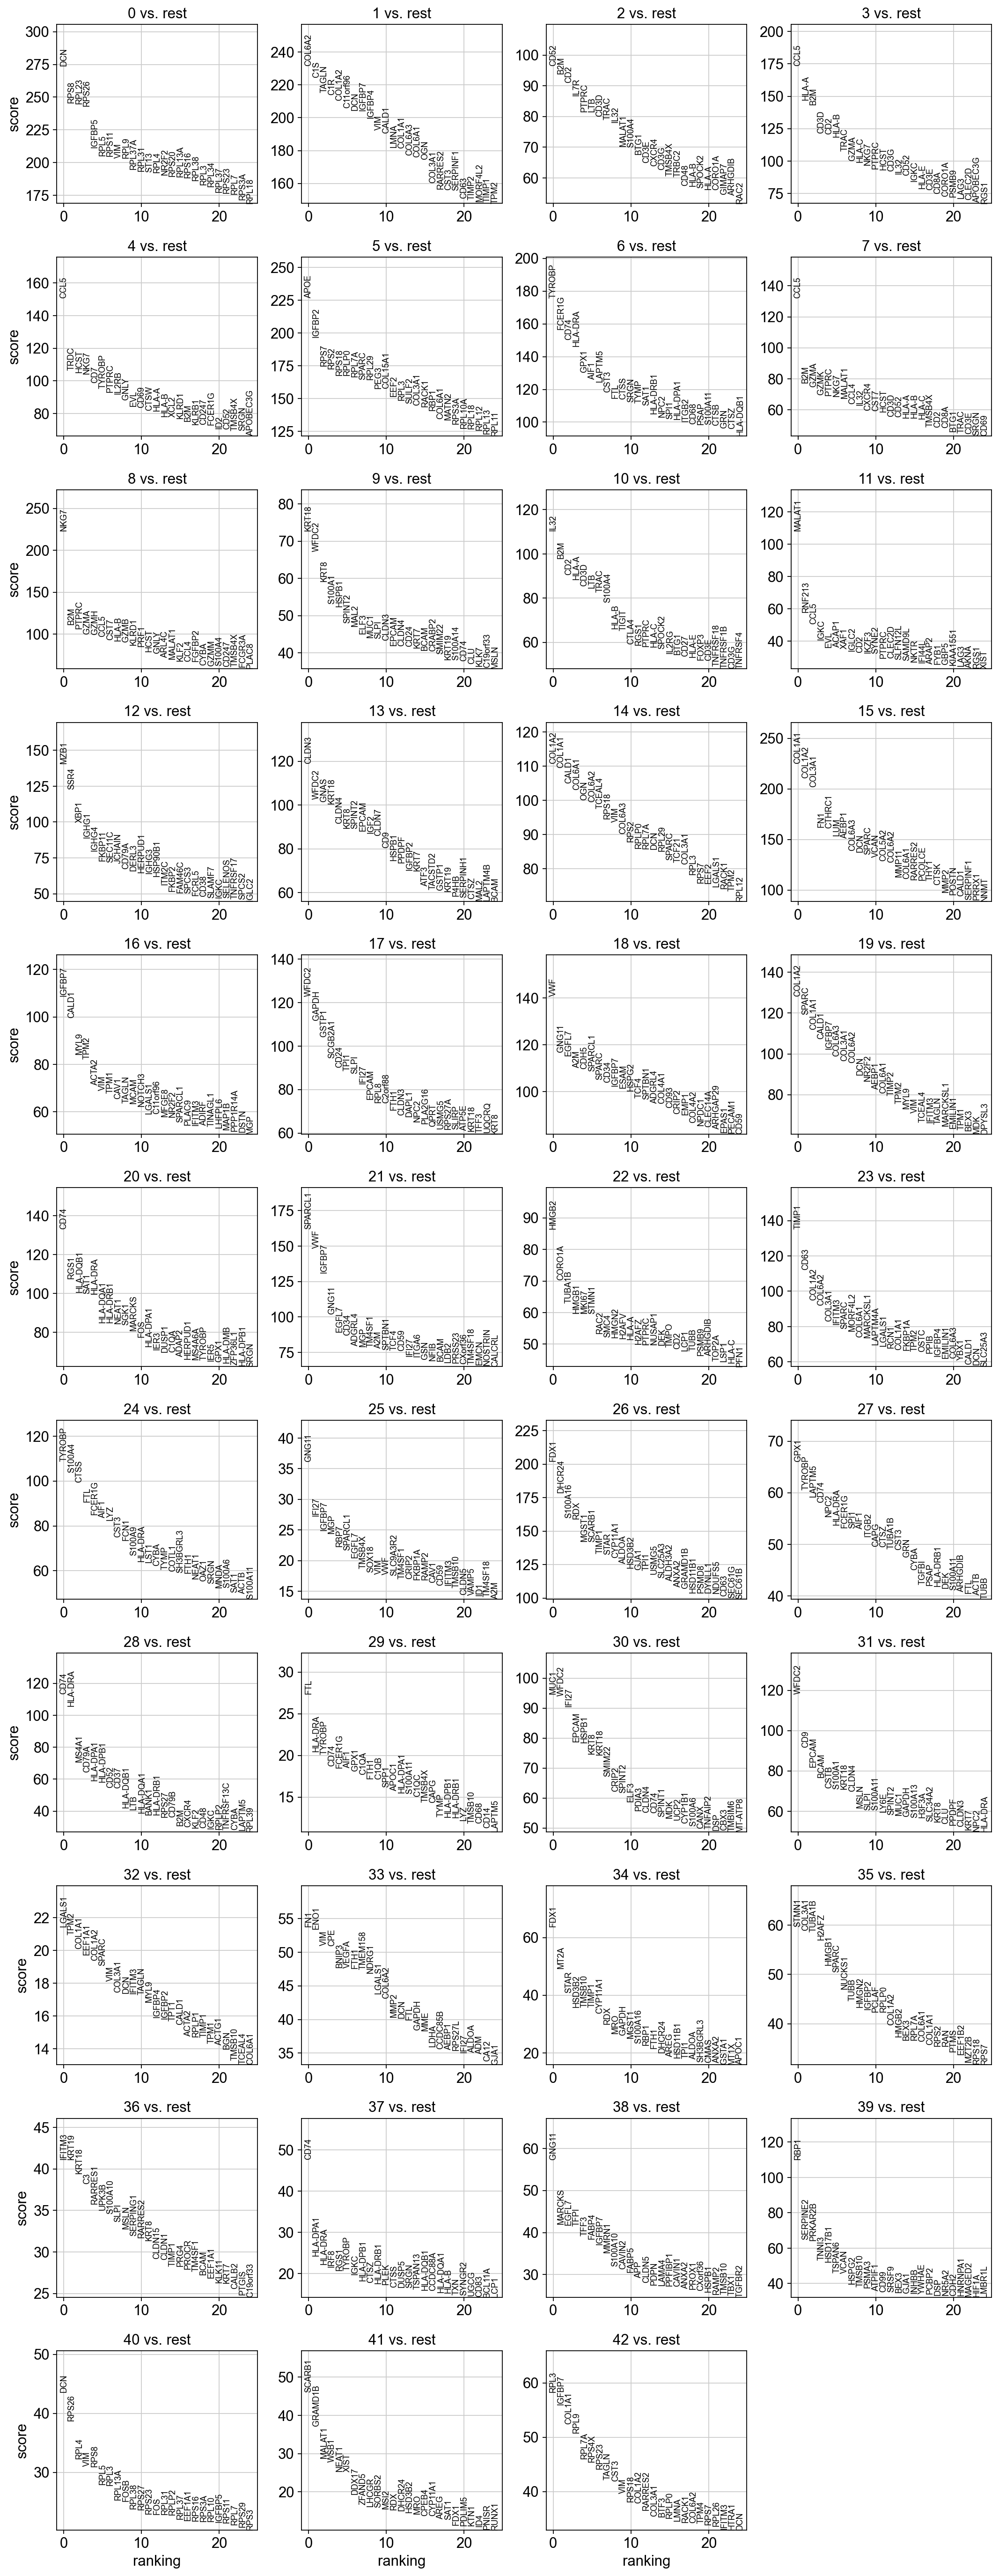

In [27]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [28]:
# 获取聚类分组和分数
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

0_n  0_p       1_n  1_p     2_n  2_p    3_n  3_p     4_n  4_p  ...  \
0     DCN  0.0    COL6A2  0.0    CD52  0.0   CCL5  0.0    CCL5  0.0  ...   
1    RPS8  0.0       C1S  0.0     B2M  0.0  HLA-A  0.0    TRDC  0.0  ...   
2   RPL23  0.0     TAGLN  0.0     CD2  0.0    B2M  0.0    HCST  0.0  ...   
3   RPS26  0.0       C1R  0.0    IL7R  0.0   CD3D  0.0    NKG7  0.0  ...   
4  IGFBP5  0.0    COL1A2  0.0   PTPRC  0.0    CD2  0.0     CD7  0.0  ...   
5    RPL5  0.0  C11orf96  0.0     LTB  0.0  HLA-B  0.0  TYROBP  0.0  ...   
6   RPS11  0.0       DCN  0.0    CD3D  0.0   TRAC  0.0   PTPRC  0.0  ...   
7     VIM  0.0    IGFBP7  0.0    TRAC  0.0   GZMA  0.0   IL2RB  0.0  ...   
8    RPL9  0.0    IGFBP4  0.0    IL32  0.0  HLA-C  0.0    GNLY  0.0  ...   
9  RPL37A  0.0       VIM  0.0  MALAT1  0.0   NKG7  0.0     EVL  0.0  ...   

      38_n          38_p      39_n           39_p    40_n          40_p  \
0    GNG11  2.928970e-91      RBP1  3.554447e-112     DCN  1.997292e-55   
1   MARCKS  2.174062e-75  SERPINE2   1.256458e-84   RPS26  1.114549e-51   
2    EGFL7  1.001988e-74   PRKAR2B   6.187748e-84    RPL4  4.037096e-46   
3     TFPI  2.912020e-74     TNNI3   9.645836e-76     VIM  2.300639e-45   
4     TFF3  1.983060e-71   HSD17B1   8.253444e-75    RPS8  4.469604e-45   
5    FABP4  2.189264e-70    TSPAN6   9.439957e-70    RPL5  1.009535e-41   
6   IGFBP7  2.112696e-69      VCAN   1.319592e-69    RPL3  6.478860e-42   
7    MMRN1  5.335264e-66     HSPG2   1.638136e-63  RPL13A  8.439456e-39   
8  S100A10  3.936419e-62    TMSB10   1.301503e-63    FOSB  5.723995e-38   
9   CAVIN2  1.771520e-60     PSMA3   1.262977e-61   RPL38  1.032515e-36   

      41_n          41_p    42_n          42_p  
0   SCARB1  1.235725e-35    RPL3  3.216901e-15  
1  GRAMD1B  4.392994e-32  IGFBP7  3.835534e-13  
2   MALAT1  4.250050e-28  COL1A1  9.058903e-13  
3     WSB1  2.358254e-27    RPL9  2.330367e-14  
4    NEAT1  6.692177e-26   RPL7A  7.626032e-13  
5     XIST  8.196917e-26   RPS4X  9.922025e-13  
6    DDX17  1.293324e-21   RPS23  9.085451e-13  
7   ZFAND5  2.952337e-19   TAGLN  9.791393e-12  
8    LHCGR  7.466940e-19    CST3  5.828921e-12  
9   SORBS2  1.356443e-18     VIM  7.971575e-12  

[10 rows x 86 columns]

In [ ]:
## 浏览全部已有leiden亚群

In [29]:
for i in adata.obs['leiden'].cat.categories:
  number = len(adata.obs[adata.obs['leiden']==i])
  print('the number of category {} is {}'.format(i,number))

the number of category 0 is 4772
the number of category 1 is 3711
the number of category 2 is 3703
the number of category 3 is 2951
the number of category 4 is 2896
the number of category 5 is 2664
the number of category 6 is 2624
the number of category 7 is 2030
the number of category 8 is 1869
the number of category 9 is 1623
the number of category 10 is 1532
the number of category 11 is 1521
the number of category 12 is 1459
the number of category 13 is 1416
the number of category 14 is 1284
the number of category 15 is 1228
the number of category 16 is 1206
the number of category 17 is 1143
the number of category 18 is 1126
the number of category 19 is 1091
the number of category 20 is 1076
the number of category 21 is 1011
the number of category 22 is 856
the number of category 23 is 617
the number of category 24 is 614
the number of category 25 is 592
the number of category 26 is 540
the number of category 27 is 482
the number of category 28 is 460
the number of category 29 is 46

In [31]:
# 如果有些群细胞数目过少可以舍去
adata = adata[adata.obs[adata.obs['leiden'].astype(int)<41].index] #40到42亚群所含细胞数过少,予以舍去
adata

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# 舍去之后更新结果

In [32]:
for i in adata.obs['leiden'].cat.categories:
  number = len(adata.obs[adata.obs['leiden']==i])
  print('the number of category {} is {}'.format(i,number))

the number of category 0 is 4772
the number of category 1 is 3711
the number of category 2 is 3703
the number of category 3 is 2951
the number of category 4 is 2896
the number of category 5 is 2664
the number of category 6 is 2624
the number of category 7 is 2030
the number of category 8 is 1869
the number of category 9 is 1623
the number of category 10 is 1532
the number of category 11 is 1521
the number of category 12 is 1459
the number of category 13 is 1416
the number of category 14 is 1284
the number of category 15 is 1228
the number of category 16 is 1206
the number of category 17 is 1143
the number of category 18 is 1126
the number of category 19 is 1091
the number of category 20 is 1076
the number of category 21 is 1011
the number of category 22 is 856
the number of category 23 is 617
the number of category 24 is 614
the number of category 25 is 592
the number of category 26 is 540
the number of category 27 is 482
the number of category 28 is 460
the number of category 29 is 46

/Users/jialechen/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>

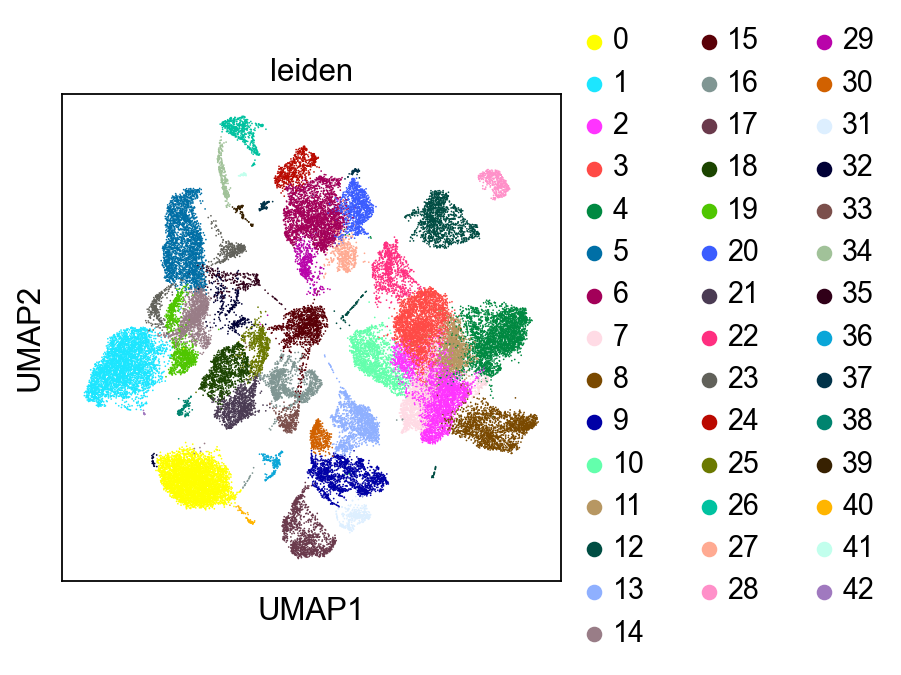

In [33]:
sc.pl.umap(adata, color=['leiden'], wspace=0.4, show=False)

In [34]:
adata

AnnData object with n_obs × n_vars = 51215 × 3533
    obs: 'sample', 'group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [35]:
import omicverse as ov
# ov.utils.download_tosica_gmt() # download annotation


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.4, Tutorials: https://omicverse.readthedocs.io/


In [8]:
## download ref data
# !wget https://cblast.gao-lab.org/Zheng/Zheng.h5ad

--2024-01-03 12:55:23--  https://cblast.gao-lab.org/Zheng/Zheng.h5ad
正在解析主机 cblast.gao-lab.org (cblast.gao-lab.org)... 159.138.49.219
正在连接 cblast.gao-lab.org (cblast.gao-lab.org)|159.138.49.219|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：500776712 (478M) [application/octet-stream]
正在保存至: “Zheng.h5ad”

Zheng.h5ad          100%[===================>] 477,58M  5,11MB/s  用时 92s       

2024-01-03 12:56:56 (5,20 MB/s) - 已保存 “Zheng.h5ad” [500776712/500776712])



In [36]:
ref_adata = ov.utils.read('Zheng.h5ad')
ref_adata

AnnData object with n_obs × n_vars = 91789 × 32643
    obs: 'cell_type1', 'lifestage', 'organism', 'dataset_name', 'platform', 'organ', 'data_type', 'cell_ontology_class', 'cell_ontology_id', 'n_genes', 'n_counts', '__libsize__'
    var: 'variable_genes'
    uns: 'cell_ontology_class_colors', 'cell_type1_colors', 'data_quality', 'known_markers', 'neighbors', 'umap'
    obsm: 'X_umap', 'latent'
    obsp: 'connectivities', 'distances'

In [10]:
## 随机选取30,000个细胞的方法，我们使用random.sample进行无放回采样

In [37]:
import random
cell_idx=list(random.sample(ref_adata.obs.index.tolist(),30000))
ref_adata=ref_adata[cell_idx]
ref_adata

View of AnnData object with n_obs × n_vars = 30000 × 32643
    obs: 'cell_type1', 'lifestage', 'organism', 'dataset_name', 'platform', 'organ', 'data_type', 'cell_ontology_class', 'cell_ontology_id', 'n_genes', 'n_counts', '__libsize__'
    var: 'variable_genes'
    uns: 'cell_ontology_class_colors', 'cell_type1_colors', 'data_quality', 'known_markers', 'neighbors', 'umap'
    obsm: 'X_umap', 'latent'
    obsp: 'connectivities', 'distances'

In [38]:
ref_adata.obs['cell_ontology_class'].cat.categories

Index(['B cell', 'T-helper 2 cell', 'cytotoxic T cell', 'dendritic cell',
       'hematopoietic precursor cell', 'memory T cell', 'monocyte',
       'naive thymus-derived CD4-positive, alpha-beta T cell',
       'naive thymus-derived CD8-positive, alpha-beta T cell',
       'natural killer cell', 'regulatory T cell'],
      dtype='object')

In [39]:
ref_adata.X.max() # 检查其归一化程度

152.0

In [40]:
#这是一个较大的整数，表明其并未进行归一化，是原始counts，我们对其进行预处理（包括归一化与高可变基因的计算）
ref_adata=ov.pp.preprocess(ref_adata,mode='shiftlog|pearson',n_HVGs=3000) 

Begin robust gene identification
After filtration, 19691/32643 genes are kept. Among 19691 genes, 14006 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


In [ ]:
## 初始化 TOSICA 模型

In [43]:
tosica_obj=ov.single.pyTOSICA(adata=ref_adata,
                              gmt_path='genesets/GO_bp.gmt', depth=1,
                              label_name='cell_ontology_class',
                              project_path='hGOBP_demo',
                              batch_size=8)

cpu
Mask loaded!


## train model
- 训练 TOSICA 模型时需要设置 4 个参数
- pre_weights： 预训练权重的路径
- lr： 学习率。
- epochs：epochs 的个数。
- lrf： 最后一层的学习率。

In [ ]:
tosica_obj.train(epochs=5)

Model builded!


[valid epoch 0] loss: 0.516, acc: 0.774:  64%|███████████▍      | 1034/1624 [02:18<01:25,  6.90it/s]

In [44]:
tosica_obj.save()
tosica_obj.load()

RuntimeError: Error(s) in loading state_dict for Transformer:
	size mismatch for feature_embed.fe.mask: copying a param with shape torch.Size([14400, 14001]) from checkpoint, the shape in current model is torch.Size([14400, 14006]).
	size mismatch for feature_embed.fe.weight: copying a param with shape torch.Size([14400, 14001]) from checkpoint, the shape in current model is torch.Size([14400, 14006]).

In [ ]:
## predict cell type

In [ ]:
new_adata=tosica_obj.predicted(pre_adata=adata)

In [ ]:
new_adata.obsm=adata[new_adata.obs.index].obsm.copy()
new_adata.obsp=adata[new_adata.obs.index].obsp.copy()
new_adata

In [ ]:
ov.utils.embedding(
    new_adata,
    basis="X_mde",
    color=['major_celltype', 'Prediction'],
    frameon='small',
    #ncols=1,
    wspace=0.5,
    #palette=ov.utils.pyomic_palette()[11:],
    show=False,
)